<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and load the data</a></span></li><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train-and-Test-Data-Splits" data-toc-modified-id="Train-and-Test-Data-Splits-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Train and Test Data Splits</a></span></li><li><span><a href="#Hyperparameter-search-using-GridSearchCV" data-toc-modified-id="Hyperparameter-search-using-GridSearchCV-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Hyperparameter search using GridSearchCV</a></span></li><li><span><a href="#Assess-model-performance" data-toc-modified-id="Assess-model-performance-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Assess model performance</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forests-Model" data-toc-modified-id="Random-Forests-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forests Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Hyperparameter-search-using-GridSearchCV" data-toc-modified-id="Hyperparameter-search-using-GridSearchCV-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Hyperparameter search using GridSearchCV</a></span></li><li><span><a href="#Assess-model-performance" data-toc-modified-id="Assess-model-performance-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Assess model performance</a></span></li></ul></li></ul></li><li><span><a href="#K-Nearest-Neighbor-(KNN)-Model" data-toc-modified-id="K-Nearest-Neighbor-(KNN)-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K Nearest Neighbor (KNN) Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Hyperparameter-search-using-GridSearchCV" data-toc-modified-id="Hyperparameter-search-using-GridSearchCV-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Hyperparameter search using GridSearchCV</a></span></li><li><span><a href="#Assess-model-performance" data-toc-modified-id="Assess-model-performance-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Assess model performance</a></span></li></ul></li></ul></li><li><span><a href="#Gradient-Boosting-Model" data-toc-modified-id="Gradient-Boosting-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gradient Boosting Model</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#Data-Quantity-Assessment" data-toc-modified-id="Data-Quantity-Assessment-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data Quantity Assessment</a></span></li><li><span><a href="#Save-Final-Model" data-toc-modified-id="Save-Final-Model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Save Final Model</a></span></li></ul></li><li><span><a href="#Summary-and-further-analysis" data-toc-modified-id="Summary-and-further-analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Summary and further analysis</a></span></li></ul></div>

## Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file
%matplotlib inline
sns.set_style('whitegrid') 
# plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./Data/03_Preprocessed.csv')
df.head()

,ID,Income,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases,Education,Marital_Status,AcceptedCmp6
0,5524,58138.0,58,0,997,1617,0,25,1,1,1
1,2174,46344.0,61,2,151,27,0,6,1,1,0
2,4141,71613.0,50,0,498,776,0,21,1,0,0
3,6182,26646.0,31,1,91,53,0,8,1,0,0
4,5324,58293.0,34,1,347,422,0,19,0,0,0


In [3]:
print(df.shape)
df.info()

(2152, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2152 non-null   int64  
 1   Income             2152 non-null   float64
 2   Age                2152 non-null   int64  
 3   Children           2152 non-null   int64  
 4   Days_Enrolled      2152 non-null   int64  
 5   TotalExpenses      2152 non-null   int64  
 6   TotalAcceptedCmp5  2152 non-null   int64  
 7   TotalNumPurchases  2152 non-null   int64  
 8   Education          2152 non-null   int64  
 9   Marital_Status     2152 non-null   int64  
 10  AcceptedCmp6       2152 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 185.1 KB


## Logistic Regression Model

#### Train and Test Data Splits

In [4]:
X = df.drop(['ID', 'AcceptedCmp6'], axis=1)
y = df['AcceptedCmp6']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
train_columns = X_train.columns

(1506, 9) (646, 9)


In [6]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#
lgr = LogisticRegression()
# Fit the model on the trainng data.
lgr.fit(X_train, y_train)

LogisticRegression()

0.8761609907120743
[[534  13]
 [ 67  32]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       547
           1       0.71      0.32      0.44        99

    accuracy                           0.88       646
   macro avg       0.80      0.65      0.69       646
weighted avg       0.86      0.88      0.86       646



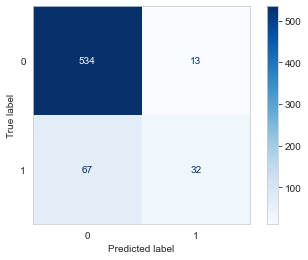

In [7]:
# Print the accuracy from the testing data.
y_pred = lgr.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cf=confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cf).plot(cmap='Blues')
plt.grid(False)
plt.show();

#### Hyperparameter search using GridSearchCV

In [8]:
#the grid of parameters to search over to find the best regularization parameter  𝐶  based *only* on the training set;
# C controls the inverse of the regularization strength. A large C can lead to an overfit model, while a small  can lead to an underfit model.
# Cs = [0.001, 0.1, 1, 10, 100]
Cs = np.logspace(-5, 8, 15)
from sklearn.model_selection import GridSearchCV
params = {'C': Cs}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, params, scoring='roc_auc', cv=5, n_jobs=1, verbose=1)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=1,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             scoring='roc_auc', verbose=1)

In [9]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))   # training accuracy
print("Best estimator is {}".format(logreg_cv.best_estimator_))
print("Best paramter is {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.8192529060990339
Best estimator is LogisticRegression(C=0.4393970560760795, random_state=42)
Best paramter is {'C': 0.4393970560760795}


In [10]:
# Predict on the test set and compute metrics
logreg = LogisticRegression(**logreg_cv.best_params_)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
r2 = logreg.score(X_test, y_test)  # test_accuracy
print("Tuned Logistic Regression R squared: {}".format(r2))

Tuned Logistic Regression R squared: 0.8761609907120743


#### Assess model performance

[[534  13]
 [ 67  32]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       547
           1       0.71      0.32      0.44        99

    accuracy                           0.88       646
   macro avg       0.80      0.65      0.69       646
weighted avg       0.86      0.88      0.86       646



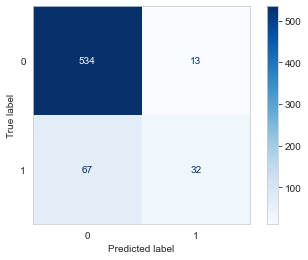

In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cf=confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cf).plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.8531198640887856


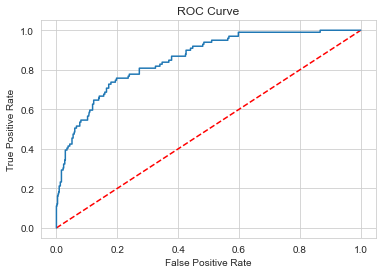

In [12]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

##  Random Forests Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

#RF_pipe.get_params().keys():to get a dict of available parameters

RF_pipe.get_params().keys()

In [14]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_default_cv_results

{'fit_time': array([0.19289041, 0.16556621, 0.16328597, 0.17366552, 0.17071629]),
 'score_time': array([0.01053333, 0.01093888, 0.01089168, 0.01092958, 0.00999665]),
 'test_score': array([0.85761589, 0.89368771, 0.87375415, 0.87043189, 0.86710963])}

In [15]:
np.mean(rf_default_cv_results['test_score']), np.std(rf_default_cv_results['test_score'])

(0.8725198565488108, 0.011877370050694383)

#### Hyperparameter search using GridSearchCV

In [16]:
n_est =  [10,20,40,50]
# 'randomforestclassifier__max_depth':[1,3,5,10]
grid_params = {
    'standardscaler': [StandardScaler(), None],
    'randomforestclassifier__n_estimators': n_est
        }
grid_params

{'standardscaler': [StandardScaler(), None],
 'randomforestclassifier__n_estimators': [10, 20, 40, 50]}

In [17]:
#dict for parameters to evaluate, 5-fold cross-validation
rf_grid_cv = GridSearchCV(RF_pipe, grid_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 20, 40,
                                                                  50],
                         'standardscaler': [StandardScaler(), None]},
             scoring='roc_auc', verbose=1)

In [18]:
print("Best Score:" + str(rf_grid_cv.best_score_))
print("Best Parameters: " + str(rf_grid_cv.best_params_))

Best Score:0.8095111581770391
Best Parameters: {'randomforestclassifier__n_estimators': 50, 'standardscaler': None}


In [19]:
# Fit the model based on the best number of estimators.
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

[[530  17]
 [ 58  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       547
           1       0.71      0.41      0.52        99

    accuracy                           0.88       646
   macro avg       0.80      0.69      0.73       646
weighted avg       0.87      0.88      0.87       646



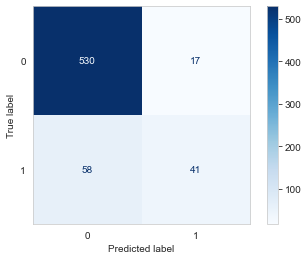

In [20]:
# plot confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cf).plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.8528982697172824


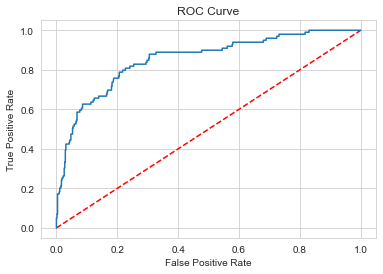

In [21]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

#### Assess model performance

In [22]:
# 'randomforestclassifier__n_estimators': 42
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_cv_results

{'fit_time': array([0.08866692, 0.08442187, 0.08177352, 0.09105492, 0.09042478]),
 'score_time': array([0.00598431, 0.00598383, 0.00598192, 0.0063498 , 0.00600839]),
 'test_score': array([0.85430464, 0.90033223, 0.87707641, 0.87043189, 0.86046512])}

In [23]:
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.85430464, 0.90033223, 0.87707641, 0.87043189, 0.86046512])

In [24]:
np.mean(rf_best_scores), np.std(rf_best_scores)  # the model is slighly improved upon the default 

(0.8725220567204243, 0.015973482293506352)

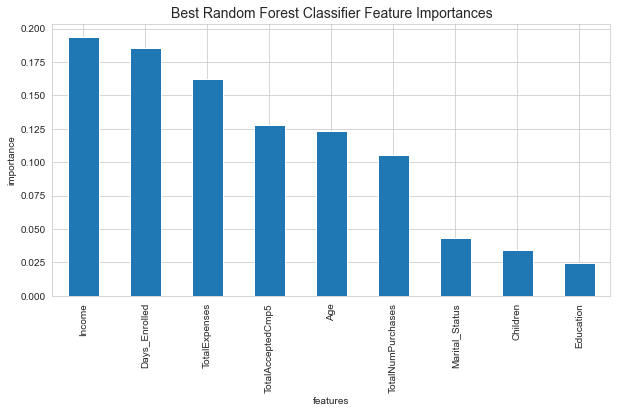

In [25]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best Random Forest Classifier Feature Importances', fontsize=14);

**the dominant top five features are:**
 - 'Income'
 - 'Days_Enrolled'
 - 'TotalExpenses'
 - 'TotalAcceptedCmp5' - total except the last champaign
 - 'Age'    

## K Nearest Neighbor (KNN) Model

In [26]:
# Import the necessary modules
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    print("train_scores {}: {}".format(i, knn.score(X_train,y_train)))  # Compute and print metrics
    print("test_scores {}: {}".format(i, knn.score(X_test,y_test)))

train_scores 1: 0.9926958831341302
test_scores 1: 0.8374613003095975
train_scores 2: 0.9150066401062417
test_scores 2: 0.8730650154798761
train_scores 3: 0.9116865869853917
test_scores 3: 0.8622291021671826
train_scores 4: 0.8924302788844621
test_scores 4: 0.8668730650154799
train_scores 5: 0.8937583001328021
test_scores 5: 0.8637770897832817
train_scores 6: 0.8811420982735724
test_scores 6: 0.8653250773993808
train_scores 7: 0.8871181938911022
test_scores 7: 0.8668730650154799
train_scores 8: 0.8798140770252324
test_scores 8: 0.871517027863777
train_scores 9: 0.8784860557768924
test_scores 9: 0.8761609907120743


In [27]:
# Identify the number of neighbors that resulted in the max score in the training dataset.
max_score = max(train_scores)
indx = train_scores.index(max_score) + 1    
print('Max train score {} and k = {}'.format(max_score, indx))

Max train score 0.9926958831341302 and k = 1


In [28]:
#Identify the number of neighbors that resulted in the max score in the test dataset.
max_score = max(test_scores)
indx = test_scores.index(max_score) + 1
print('Max test score {} and k = {}'.format(round(max_score), indx))

Max test score 1 and k = 9


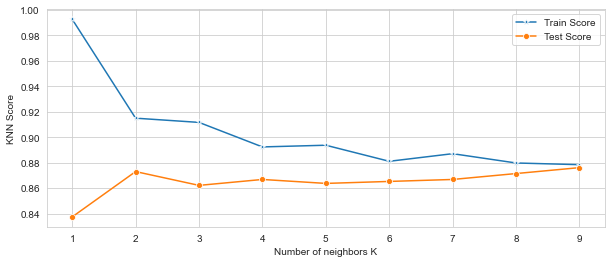

In [29]:
plt.figure(figsize=(10,4))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')
plt.xlabel('Number of neighbors K')
plt.ylabel('KNN Score')
plt.show();

In [30]:
# Fit and score the best number of neighbors based on the plot.
best_neighbors = 2

knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(X_train,y_train)
train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print('Train score for n=2 neighbors: ', train_score)
print('Test score for n=2 neighbors: ', test_score)

Train score for n=2 neighbors:  0.9150066401062417
Test score for n=2 neighbors:  0.8730650154798761


In [31]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

[[538   9]
 [ 73  26]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       547
           1       0.74      0.26      0.39        99

    accuracy                           0.87       646
   macro avg       0.81      0.62      0.66       646
weighted avg       0.86      0.87      0.85       646



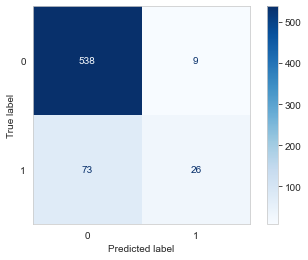

In [32]:
# plot confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay
cf = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cf).plot(cmap='Blues')

plt.grid(False)
plt.show();

#### Hyperparameter search using GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(1,30)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,params,scoring='roc_auc', cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='roc_auc')

In [34]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8151623108482523
Best Parameters: {'n_neighbors': 24}


In [35]:
best_neighbors = 24

knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(X_train,y_train)
train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print('Train score for n=2 neighbors: ', train_score)  # # the model is slighly improved upon the default 
print('Test score for n=2 neighbors: ', test_score)

y_pred = knn.predict(X_test)

Train score for n=2 neighbors:  0.8711819389110226
Test score for n=2 neighbors:  0.871517027863777


#### Assess model performance

[[543   4]
 [ 79  20]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       547
           1       0.83      0.20      0.33        99

    accuracy                           0.87       646
   macro avg       0.85      0.60      0.63       646
weighted avg       0.87      0.87      0.84       646



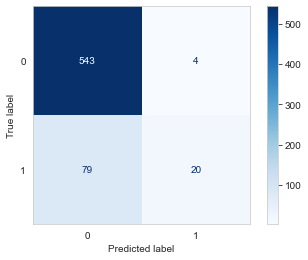

In [36]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf)
cmd.plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.8089764186656325


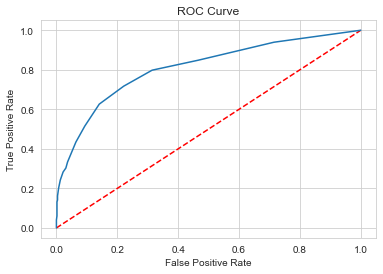

In [37]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

## Gradient Boosting Model

In [38]:
gb = GradientBoostingClassifier(random_state=42)

In [39]:
###gb.get_params(deep=True)
params = {'n_estimators':[5,10,20],'learning_rate':[0.25,.5,.75,1], 'max_depth': [2,3,4], 'max_features': [2,3,4]}
gb_cv = GridSearchCV(gb, params, scoring='roc_auc', cv=5)
gb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.25, 0.5, 0.75, 1],
                         'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'n_estimators': [5, 10, 20]},
             scoring='roc_auc')

In [40]:
print("Best Parameters: " + str(gb_cv.best_params_))
print("Best Score:" + str(gb_cv.best_score_))

Best Parameters: {'learning_rate': 0.25, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}
Best Score:0.8231924463626029


In [41]:
# test multiple learning rates in the gradient boosting classifier.
learning_rates = [0.05, 0.25, 0.5, 0.75, 1, 1.25]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

    print()

Learning rate:  0.05
Accuracy score (training): 0.853
Accuracy score (validation): 0.850

Learning rate:  0.25
Accuracy score (training): 0.889
Accuracy score (validation): 0.864

Learning rate:  0.5
Accuracy score (training): 0.895
Accuracy score (validation): 0.872

Learning rate:  0.75
Accuracy score (training): 0.897
Accuracy score (validation): 0.868

Learning rate:  1
Accuracy score (training): 0.896
Accuracy score (validation): 0.858

Learning rate:  1.25
Accuracy score (training): 0.901
Accuracy score (validation): 0.856



In [42]:
# Apply the best learning rate to the model fit and predict on the testing set. 
gbc = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, 
                                    max_features=4, max_depth = 2, random_state = 42)
gbc.fit(X_train, y_train)
# predict
y_pred = gbc.predict(X_test)

In [43]:
gbc.feature_importances_

array([0.17893521, 0.03012167, 0.0202228 , 0.14563523, 0.27593222,
       0.22404335, 0.03328077, 0.01563539, 0.07619337])

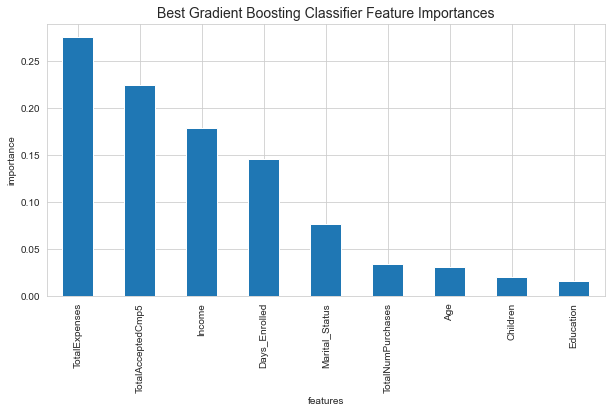

In [44]:
plt.subplots(figsize=(10, 5))
imps = gbc.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best Gradient Boosting Classifier Feature Importances', fontsize=14);

**the dominant top five features are:**
 - 'TotalExpenses'
 - 'TotalAcceptedCmp5' - total accepted response except the last champaign
 - 'Income'
 - 'Days_Enrolled'
 - 'Marital Status'

In terms of Expenses:
Customers with more expenses are more responsive to the last champaign. 

In terms of total number of champaign:
Customers with more responses to the first 5 champaign are more active to the last one.

In terms of Income:
Active customers have higher income compare to that of no-response customers.

In terms of days_enrolled:
Loyal customers are highly responsive as they engaged with company for longer period of time.

In terms of Marital_status:
Couples are slightly more active comparing to single people.

[[519  28]
 [ 63  36]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       547
           1       0.56      0.36      0.44        99

    accuracy                           0.86       646
   macro avg       0.73      0.66      0.68       646
weighted avg       0.84      0.86      0.85       646



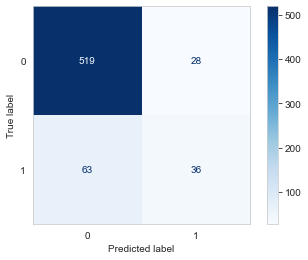

In [45]:
# Print out the confusion matrix and the classification report to review the model performance.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf)
cmd.plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.821228740789984


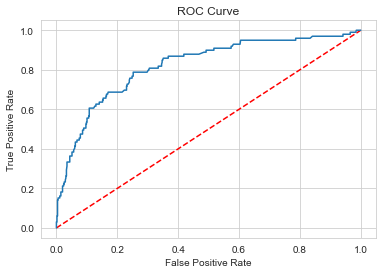

In [46]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

## XGBoost 

In [47]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                           n_estimators=100, learning_rate=0.5, max_depth=3, eval_metric='auc', use_label_encoder=False, random_state=42)

xgb_clf.fit(X_train, y_train)  # 'mlogloss'
y_pred = xgb_clf.predict(X_test)
# Print the accuracy
accuracy = float(np.sum(y_pred == y_test)) / y_pred.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.863777


In [48]:
# xgb_clf.get_params
# xgb_clf.get_xgb_params()

In [49]:
# cross_validation on XGBoost
dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":'binary:logistic', "max_depth":3}
xgb_cv = xgb.cv(dtrain=dmatrix, params=params, nfold=4, num_boost_round=10, metrics='auc', as_pandas=True, seed=42)

# Print cv_results
print(xgb_cv)

# print(((1-cv_results["test-error-mean"]).iloc[-1])) # metrics ='error'
print((xgb_cv["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.792226       0.017302       0.763671      0.032926
1        0.821355       0.008187       0.787243      0.020764
2        0.826518       0.007119       0.791159      0.024548
3        0.837906       0.009265       0.807251      0.025183
4        0.850921       0.003939       0.819527      0.028493
5        0.858069       0.006866       0.828155      0.021071
6        0.863695       0.006615       0.827552      0.021397
7        0.871950       0.005439       0.828239      0.017095
8        0.874882       0.004682       0.829850      0.018090
9        0.881564       0.004570       0.830993      0.018731
0.8309930000000001


cv_results stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From cv_results, the final round 'test-error-mean' is extracted and converted into an accuracy, where accuracy is 1-error. The final accuracy of around 87% is an improvement from earlier!

In [50]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.792226,0.017302,0.763671,0.032926
1,0.821355,0.008187,0.787243,0.020764
2,0.826518,0.007119,0.791159,0.024548
3,0.837906,0.009265,0.807251,0.025183
4,0.850921,0.003939,0.819527,0.028493
5,0.858069,0.006866,0.828155,0.021071
6,0.863695,0.006615,0.827552,0.021397
7,0.871950,0.005439,0.828239,0.017095
8,0.874882,0.004682,0.829850,0.018090
9,0.881564,0.004570,0.830993,0.018731


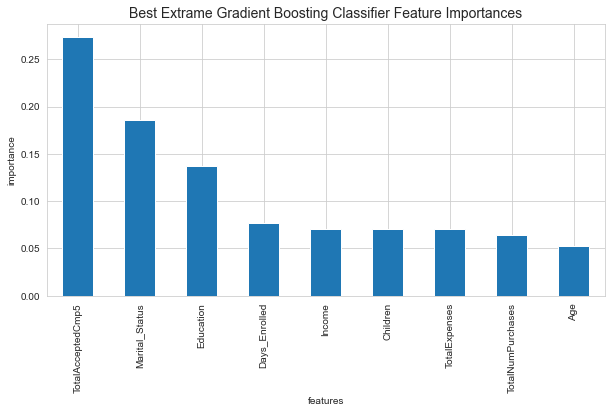

In [51]:
plt.subplots(figsize=(10, 5))
imps = xgb_clf.feature_importances_
rf_feat_imps = pd.Series(imps, index=train_columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best Extrame Gradient Boosting Classifier Feature Importances', fontsize=14);

**the dominant top five features are:**
 - 'TotalAcceptedCmp5' - total accepted responses except the last champaign
 - 'Marital Status'
 - 'Education'
 - 'Days_Enrolled'
 - 'Income'

[[523  24]
 [ 64  35]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       547
           1       0.59      0.35      0.44        99

    accuracy                           0.86       646
   macro avg       0.74      0.65      0.68       646
weighted avg       0.85      0.86      0.85       646



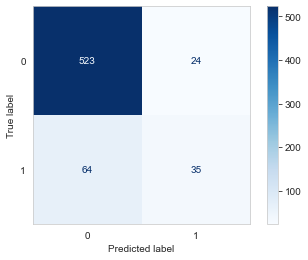

In [52]:
# Print out the confusion matrix and the classification report to review the model performance.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf)
cmd.plot(cmap='Blues')
plt.grid(False)
plt.show();

ROC_AUC: 0.827285653611065


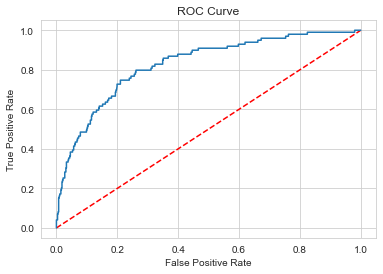

In [53]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = xgb_clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("ROC_AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

## Model Selection

To solve this binary classification problem, the following algorithms are used:

Non-Ensemble Algorithms:
- Logistic Regression
- KNeighborsClassifier

Ensemble Algorithms:
- RandomForestClassifier
- GradientBoostingClassifier
- XGBoost

Metrics:
- Accuracy (identify as many correct as possible)
- roc_auc_score ( for binary classification problem)

In [54]:
models = [logreg, rf, knn, gbc, xgb_clf]

results = pd.DataFrame(columns=['name', 'ROC_AUC'])

for model in models:
    name = model.__class__.__name__
    model.fit(X_train, y_train)
        
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    rocauc = roc_auc_score(y_test, y_pred_proba)
    
    results = results.append({'name': name, 'ROC_AUC': rocauc}, ignore_index=True)
    
    print('Model: %s, ROC_AUC: %.4f' % (name, rocauc))
    print('====================================================')
    
results

Model: LogisticRegression, ROC_AUC: 0.8531
Model: RandomForestClassifier, ROC_AUC: 0.8529
Model: KNeighborsClassifier, ROC_AUC: 0.8090
Model: GradientBoostingClassifier, ROC_AUC: 0.8212
Model: XGBClassifier, ROC_AUC: 0.8273


,name,ROC_AUC
0,LogisticRegression,0.853120
1,RandomForestClassifier,0.852898
2,KNeighborsClassifier,0.808976
3,GradientBoostingClassifier,0.821229
4,XGBClassifier,0.827286


In [55]:
datapath = './Data'
save_file(results, '04_results.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./Data\04_results.csv"


In [56]:
list_auc = results.values.tolist()
list_auc

[['LogisticRegression', 0.8531198640887856],
 ['RandomForestClassifier', 0.8528982697172824],
 ['KNeighborsClassifier', 0.8089764186656325],
 ['GradientBoostingClassifier', 0.821228740789984],
 ['XGBClassifier', 0.827285653611065]]

In [57]:
list_of_strings = ["Models", "ROC_AUC"]
for x in range(5):
    list_of_strings.append(list_auc[x][0])
    list_of_strings.append(list_auc[x][1])

Both LogisticRegression and Random forest classifier have very strong AUC of 0.85, but Random forest model has higher True Positive Rate (TP/P) based off the confusion matrix. The performance on the test set is consistent with the cross-validation results.

### Data Quantity Assessment

In [58]:
# Would more data be useful?  Assess this trade off by seeing how performance varies with differing data set sizes.
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(RF_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

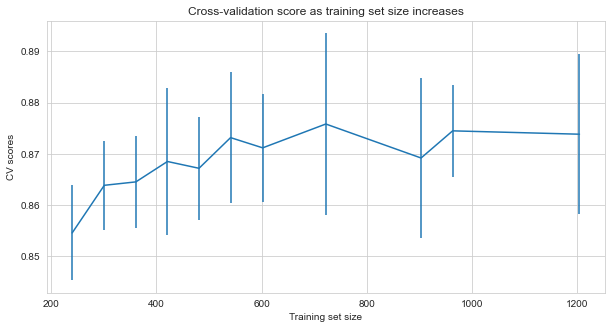

In [59]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

There's an initial rapid improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 500-600.  This shows that we seem to have plenty of data. 

### Save Final Model

In [60]:
final_model = rf_grid_cv.best_estimator_
final_model.version = '1.0'
final_model.pandas_version = pd.__version__
final_model.numpy_version = np.__version__
final_model.sklearn_version = sklearn_version
final_model.build_datetime = datetime.datetime.now()

# save the model

modelpath = '../models'
save_file(final_model, 'customer_analysis_model.pkl', modelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../models\customer_analysis_model.pkl"


## Summary and further analysis

- To solve this binary classification problem, I trained 5 different supervised machine learning models. After comparing and evaluating the model performance, the final random forest model is selected and applied to predict customers' response to the last marketing champaign. 
- The final random forest model has the average accuracy of 0.88 and a strong roc_auc of 0.85, which is consistent with cross validation roc of 0.83. The random forest model is fast to train, easy to tune and not prone to overfitting.
- The analysis of customers' family structures, income and spending behaviors can help business better plan marketing strategies, boost new customer enrollment and potentially increase revenue. Further analysis which features contribute most to customers' total expenses may generate more insights from the data.